# Loan Analysis

This is a loan data in where we have to predict loan_status based on several atrributes. These attributes are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. 


## Importing libraries 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
from sklearn import preprocessing

## Change the directory & read the csv file 

We have changed the present directory where dataset (csv file) is present and read first 4 Rows of training Dataset


In [2]:
import os
os.chdir(r"C:\Users\Soham\Desktop\credit_risk")
os.getcwd()

'C:\\Users\\Soham\\Desktop\\credit_risk'

In [3]:
data = pd.read_csv('loan_data.csv')
data.head(4)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male


##   Find unique elements

Now , we have obtained the unique elements from dataset which are principal and loan status 

In [4]:
data['Principal'].unique()

array([1000,  300,  800,  900,  700,  500], dtype=int64)

In [5]:
data['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

##  Label encoding 

LabelEncoder can be used to normalize labels.Here , we transform non-numerical labels (as long as they are hashable and comparable) to numerical labels. 


In [6]:
data1=data.copy()

In [7]:
le=preprocessing.LabelEncoder()
data['loan_status']=le.fit_transform(data['loan_status'])
data['Gender']=le.fit_transform(data['Gender'])
data['education']=le.fit_transform(data['education'])
data['past_due_days']=le.fit_transform(data['past_due_days'])
data.head(5) # First 5 rows of dataset


,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,2,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,83,45,1,1
1,xqd20168902,2,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,173,50,0,0
2,xqd20160003,2,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,172,33,0,0
3,xqd20160004,2,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,171,27,3,1
4,xqd20160005,2,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,170,28,3,0


In [8]:
df =data1[data['past_due_days'] ==60 ]
df.head(5)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
299,xqd20160300,PAIDOFF,1000,30,9/14/2016,10/13/2016,10/13/2016 11:00,NaN,28,college,male


## Group-by 

Here we have calculated aggregate of three loan status of both male and female persons.

In [9]:
data1.groupby('loan_status')['Gender'].agg(['count'])

,count
loan_status,
COLLECTION,100
COLLECTION_PAIDOFF,100
PAIDOFF,300


## Plotting graph

Different Plots for variable loan status of training data set

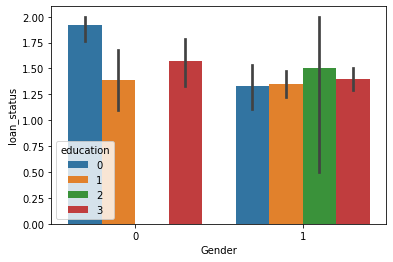

In [10]:
sns.barplot(x="Gender", y="loan_status", hue="education", data=data)


In [11]:
data['past_due_days'].unique()

array([ 83, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162,
       161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149,
       148, 147, 174, 175, 176, 177, 205, 204, 203, 202, 201, 200, 199,
       198, 197, 196, 195, 194, 193, 206, 192, 190, 189, 188, 187, 186,
       185, 184, 183, 182, 181, 180, 179, 178, 146, 145, 144, 113, 111,
       110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100,  99,  98,
        97,  96,  95,  94,  93,  92,  91,  90,  89,  88,  87,  86,  85,
       112, 114, 143, 115, 142, 141, 140, 139, 138, 137, 136, 135, 134,
       133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121,
       120, 119, 118, 117, 116, 191, 208, 316, 209, 298, 297, 296, 295,
       294, 293, 292, 291, 290, 289, 288, 287, 286, 285, 284, 283, 282,
       281, 280, 279, 278, 277, 276, 275, 274, 273, 272, 299, 300, 301,
       302, 330, 329, 328, 327, 326, 325, 324, 323, 322, 321, 320, 319,
       318, 331, 317, 315, 314, 313, 312, 311, 310, 309, 308, 30

In [12]:
# Men are likly to keep due days
x=data.groupby('Gender')['past_due_days'].agg(['sum'])
x=pd.DataFrame(x)
x

,sum
Gender,
0,9677
1,48332


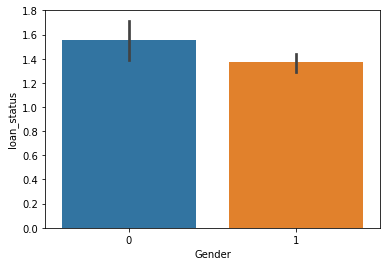

In [13]:
sns.barplot(x='Gender',y='loan_status',data=data)

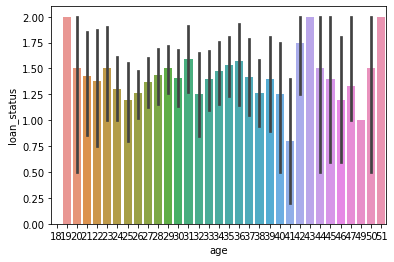

In [14]:
sns.barplot(x='age',y='loan_status',data=data)

C:\Users\Soham\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


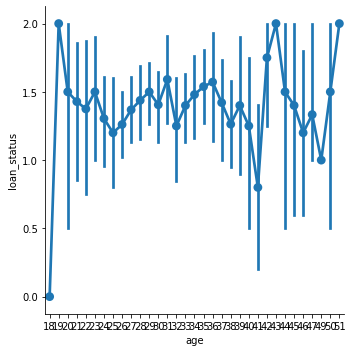

In [15]:
sns.factorplot(x='age',y='loan_status',data=data)

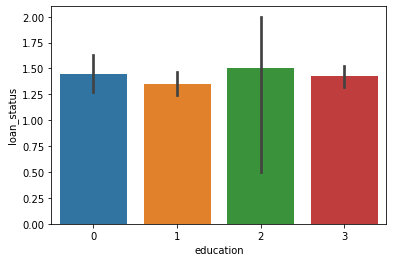

In [16]:
sns.barplot(x='education',y='loan_status',data=data)

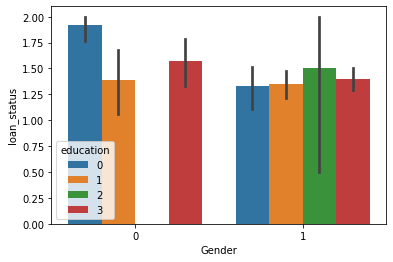

In [17]:
sns.barplot(x='Gender', y = 'loan_status', hue = 'education', data = data)

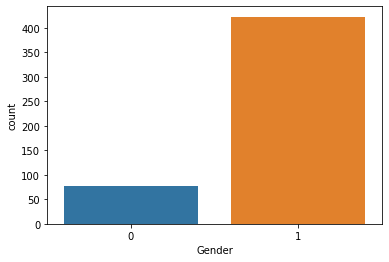

In [18]:
sns.countplot(x='Gender',data=data)

In [19]:
data.head(4)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,2,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,83,45,1,1
1,xqd20168902,2,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,173,50,0,0
2,xqd20160003,2,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,172,33,0,0
3,xqd20160004,2,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,171,27,3,1


Drop some columns of this dataset

In [20]:
data2=data
data2.drop('Loan_ID', axis=1, inplace=True)
label = data2.pop('loan_status')
data2.drop('effective_date', axis=1, inplace=True)
data2.drop('due_date', axis=1, inplace=True)
data2.drop('paid_off_time', axis=1, inplace=True)
data2.head(5)

,Principal,terms,past_due_days,age,education,Gender
0,1000,30,83,45,1,1
1,1000,30,173,50,0,0
2,1000,30,172,33,0,0
3,1000,15,171,27,3,1
4,1000,30,170,28,3,0


##  Model-building for training and testing 

##  Train-test split 

In [21]:
from tkinter import *
from sklearn.model_selection import train_test_split

data_train, data_test, label_train, label_test = train_test_split(data2, label, test_size = 0.2, random_state = 42)

##  Logistic regression 

Here we have used logistic regression algorithm for testing data

In [22]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(data_train, label_train)
logis_score_train = logis.score(data_train, label_train)
print("Training score: ",logis_score_train)
logis_score_test = logis.score(data_test, label_test)
print("Testing score: ",logis_score_test)

C:\Users\Soham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Soham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training score:  0.9625
Testing score:  0.97


## Correlation 

In [23]:
coeff_df = pd.DataFrame(data2.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Correlation"] = pd.Series(logis.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Features,Correlation
1,past_due_days,0.002906
0,terms,0.000195
3,education,-0.014558
2,age,-0.021474
4,Gender,-0.024781


##  Conclusion 

Finally after testing data, we have got near about 97% accurate result .